In [106]:
import numpy as np
import skimage as sk
from PIL import Image
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
im = Image.open("../3dmodel/img/Zanabazar/COR525.TIF")

skull = np.array(im);

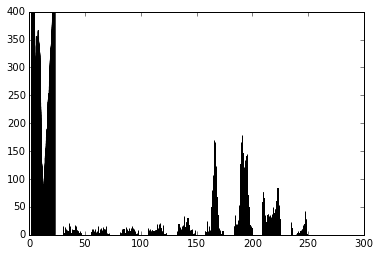

In [65]:
plt.hist(skull)
plt.show()

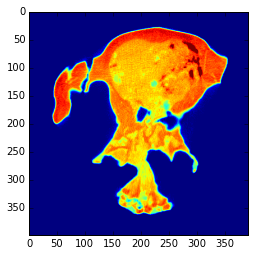

In [210]:
plt.imshow(skull)

# Try out some contour finding:

In [113]:
from skimage.feature import canny
edges = canny(skull/255.)

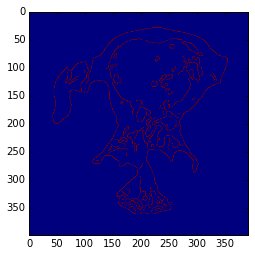

In [114]:
plt.imshow(edges)

In [62]:
#try filling holes based on the contour to find 
# (it wasn't very successful)

from scipy import ndimage as ndi
fill_skull = ndi.binary_fill_holes(edges)

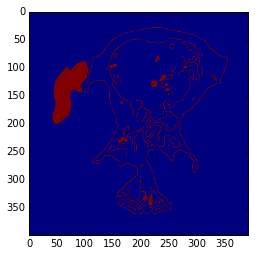

In [211]:
plt.imshow(fill_skull)

# Edge finding

with intent of using this for watershed 

In [115]:
from skimage.filters import sobel
from skimage.filters import scharr
sobel_map = sobel(skull)
scharr_map = scharr(skull)

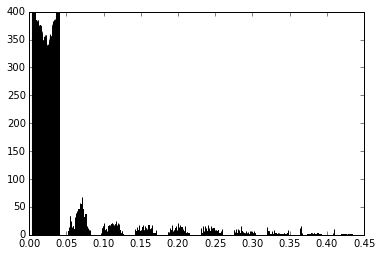

In [116]:
plt.hist(sobel_map)
plt.show()

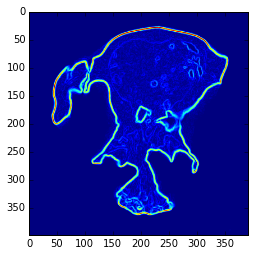

In [151]:
plt.imshow(sobel_map)
plt.show()

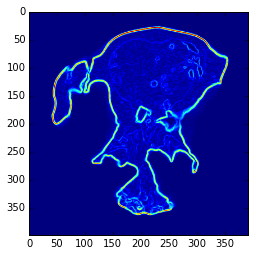

In [212]:
plt.imshow(scharr_map)
plt.show()

# Watershed Region Selection

In [77]:
markers = np.zeros_like(skull)
markers[skull < 25] = 1
markers[skull > 75] = 2

In [139]:
from skimage.morphology import watershed
segmentation = watershed(sobel_map, markers)

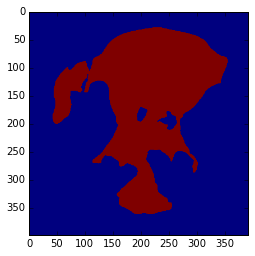

In [214]:
plt.imshow(segmentation)

# Now use this selected region as a mask
this way we can do edge finding on only the internal region of the skull

In [203]:
#scale mask values to binary 0-1
mask = segmentation - 1
#also exclude the edge region of the skull
mask[(mask == 1) & (sobel_map > .1)] = 0

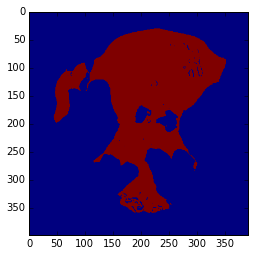

In [205]:
plt.imshow(mask)

In [215]:
# re-do edge selection on only the internal region
sobel_map2 = sobel(skull, mask)
scharr_map2 = scharr(skull, mask)

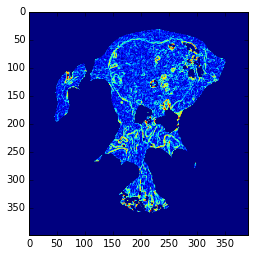

In [216]:
plt.imshow(sobel_map2)

# Conclusion:

the inner area edge finding did a better job at emphasizing the boundary we're interested in. But still there is too much messy things happening right now to have a clear solution.